In [4]:
##Importing liabraries

In [5]:
import pandas as pd
import numpy as np


In [6]:
df1 = pd.read_csv('/content/fear_greed_index.csv')
df1.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [7]:
df2 = pd.read_csv('/content/historical_data.csv')
df2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [8]:
df1['date'] = pd.to_datetime(df1['date'], format='%Y-%m-%d')
df2['Timestamp IST'] = pd.to_datetime(df2['Timestamp IST'], format='%d-%m-%Y %H:%M')

In [9]:
df2['trade_date'] = df2['Timestamp IST'].dt.date
df1['sentiment_date'] = df1['date'].dt.date

In [10]:
sentiment_map = {
    'Extreme Fear': 0,
    'Fear': 1,
    'Neutral': 2,
    'Greed': 3,
    'Extreme Greed': 4
}

In [11]:
df1['sentiment_score'] = df1['classification'].map(sentiment_map)

In [12]:
fear_greed_df = df1[['sentiment_date','sentiment_score', 'classification']]
historical_data_df = df2[['Account','Coin','Execution Price','Size Tokens','Size USD','Side','Closed PnL','Direction','trade_date']]

In [13]:
fear_greed_df.head()

,sentiment_date,sentiment_score,classification
0,2018-02-01,1,Fear
1,2018-02-02,0,Extreme Fear
2,2018-02-03,1,Fear
3,2018-02-04,0,Extreme Fear
4,2018-02-05,0,Extreme Fear


In [14]:
historical_data_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Closed PnL,Direction,trade_date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.0,Buy,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,0.0,Buy,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,0.0,Buy,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,0.0,Buy,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,0.0,Buy,2024-12-02


In [15]:
# Merge the two DataFrames on the date columns
merged_df = pd.merge(
    historical_data_df,
    fear_greed_df,
    left_on='trade_date',
    right_on='sentiment_date',
    how='left'
)
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Closed PnL,Direction,trade_date,sentiment_date,sentiment_score,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed


In [16]:
# checking the number of trades with and without sentiment data
total_trades = len(merged_df)
matched_sentiment = merged_df['sentiment_score'].notna().sum()
unmatched_sentiment = total_trades - matched_sentiment
print(f"Total Trades: {total_trades}")
print(f"Matched Sentiment: {matched_sentiment}")
print(f"Unmatched Sentiment: {unmatched_sentiment}")
merged_df.head()

Total Trades: 211224
Matched Sentiment: 211218
Unmatched Sentiment: 6


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Closed PnL,Direction,trade_date,sentiment_date,sentiment_score,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed


In [17]:
merged_df.to_csv('merged_data.csv', index=False)
# Save the merged DataFrame to a CSV file

In [18]:
# Trade level feature
merged_df['PnL_bin'] = merged_df['Closed PnL'].apply(lambda x: 'Profit' if x > 0 else ('Loss' if x < 0 else 'Zero'))
# PnL bin (profit/loss/zero)

In [19]:
# Convert 'Side' to binary values
merged_df['Side_Binary'] = merged_df['Side'].apply(lambda x : 1 if str(x).upper() == 'BUY' else 0)
# Trade Imapct (proxy for exposure)
merged_df['Trade_Imapct'] = merged_df['Size USD']
# Normalized PnL = PnL/Size USD (risk Adjusted return)
merged_df['Closed_PnL_Numeric'] = historical_data_df['Closed PnL']
merged_df['Normalized_PnL'] = merged_df.apply(
    lambda row : row['Closed_PnL_Numeric'] / row['Size USD'] if row['Size USD'] else 0, axis=1
)

In [20]:
merged_df[['Account', 'trade_date', 'Side', 'Side_Binary', 'Size USD',
           'Closed PnL', 'PnL_bin', 'Trade_Imapct', 'Normalized_PnL','classification']].head()

,Account,trade_date,Side,Side_Binary,Size USD,Closed PnL,PnL_bin,Trade_Imapct,Normalized_PnL,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,BUY,1,7872.16,0.0,Zero,7872.16,0.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,BUY,1,127.68,0.0,Zero,127.68,0.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,BUY,1,1150.63,0.0,Zero,1150.63,0.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,BUY,1,1142.04,0.0,Zero,1142.04,0.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,BUY,1,69.75,0.0,Zero,69.75,0.0,Extreme Greed


In [21]:
# Account_Level Daily Aggregation

daily_account_stats = merged_df.groupby(['Account', 'trade_date', 'classification', 'sentiment_score']).agg({
    'Closed PnL': ['sum', 'mean'],
    'Size USD': ['sum', 'mean'],
    'Side_Binary': 'mean',
    'PnL_bin': lambda x: (x == 'Profit').sum(),
    'Account': 'count'
}).reset_index()

daily_account_stats.columns = [
    'Account', 'trade_date', 'classification', 'sentiment_score',
    'Total_PnL', 'Avg_PnL',
    'Total_Trade_Size', 'Avg_Trade_Size',
    'Buy_Ratio',
    'Profit_Trades',
    'Total_Trades'
]

daily_account_stats['Profit_Rate'] = daily_account_stats['Profit_Trades'] / daily_account_stats['Total_Trades']
daily_account_stats.head()

,Account,trade_date,classification,sentiment_score,Total_PnL,Avg_PnL,Total_Trade_Size,Avg_Trade_Size,Buy_Ratio,Profit_Trades,Total_Trades,Profit_Rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Extreme Greed,4.0,0.0,0.000000,900880.13,5089.718249,0.000000,0,177,0.000000
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,Extreme Greed,4.0,0.0,0.000000,542413.18,7976.664412,0.000000,0,68,0.000000
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,Extreme Greed,4.0,0.0,0.000000,949380.00,23734.500000,0.000000,0,40,0.000000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,Extreme Greed,4.0,-21227.0,-1768.916667,338240.00,28186.666667,1.000000,0,12,0.000000
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,Extreme Greed,4.0,1603.1,59.374074,465700.00,17248.148148,0.444444,12,27,0.444444


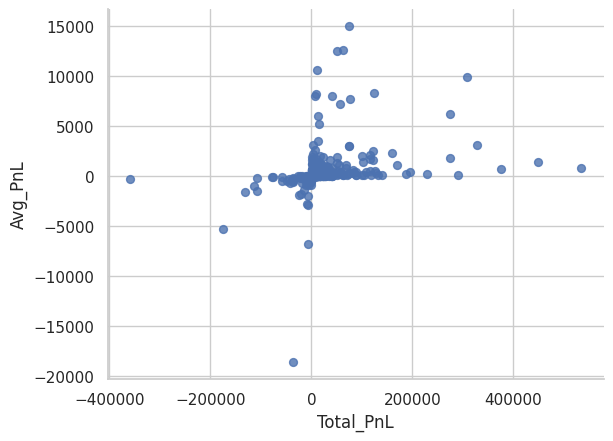

In [22]:
# @title Total_PnL vs Avg_PnL

from matplotlib import pyplot as plt
daily_account_stats.plot(kind='scatter', x='Total_PnL', y='Avg_PnL', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

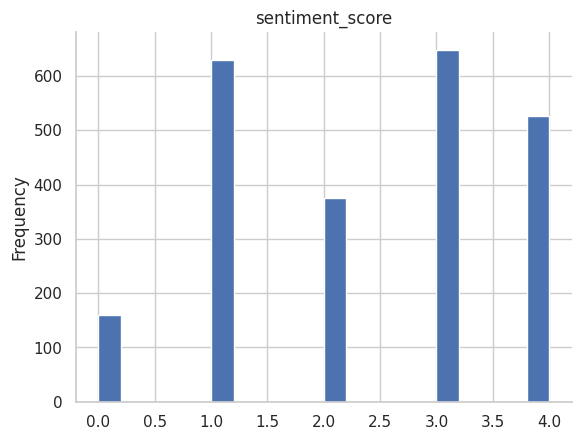

In [23]:
# @title sentiment_score

from matplotlib import pyplot as plt
daily_account_stats['sentiment_score'].plot(kind='hist', bins=20, title='sentiment_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

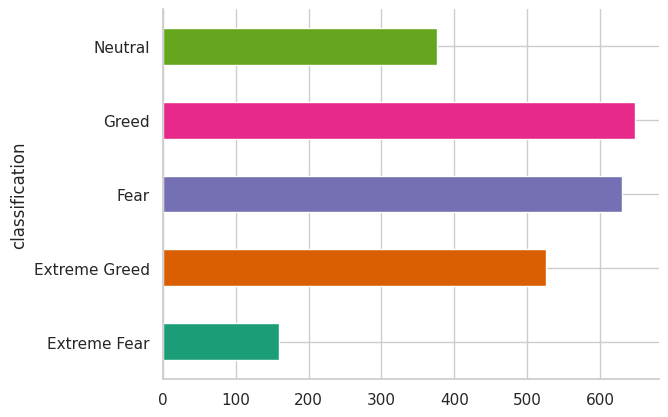

In [24]:
# @title classification

from matplotlib import pyplot as plt
import seaborn as sns
daily_account_stats.groupby('classification').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/tmp/ipython-input-1520339048.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=daily_account_stats, x='classification', y='Avg_PnL', palette='coolwarm')


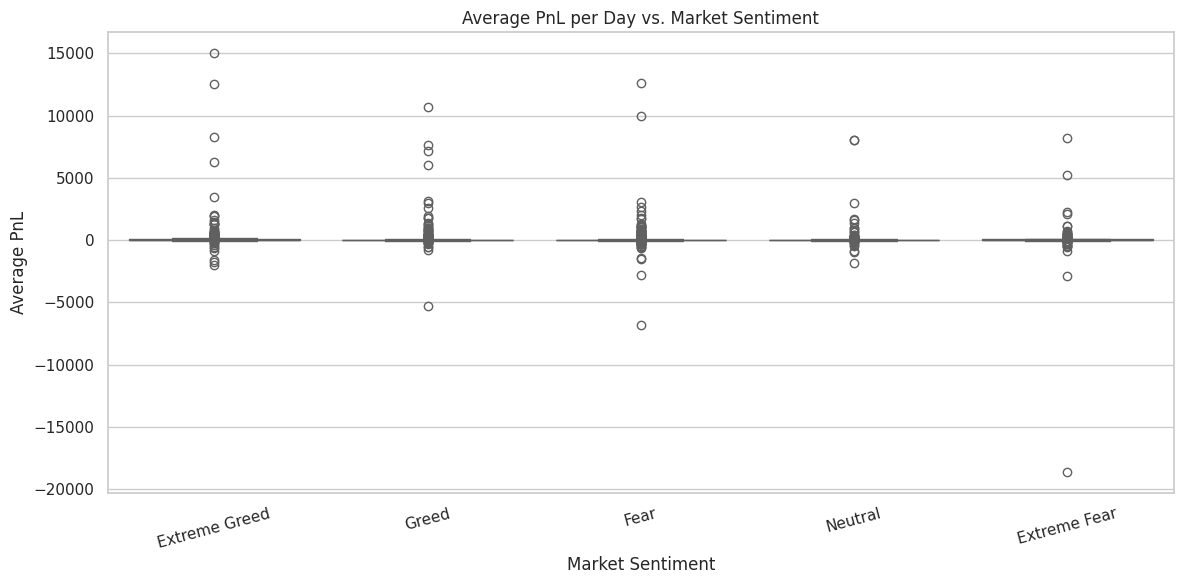

/tmp/ipython-input-1520339048.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=daily_account_stats, x='classification', y='Profit_Rate', palette='viridis')


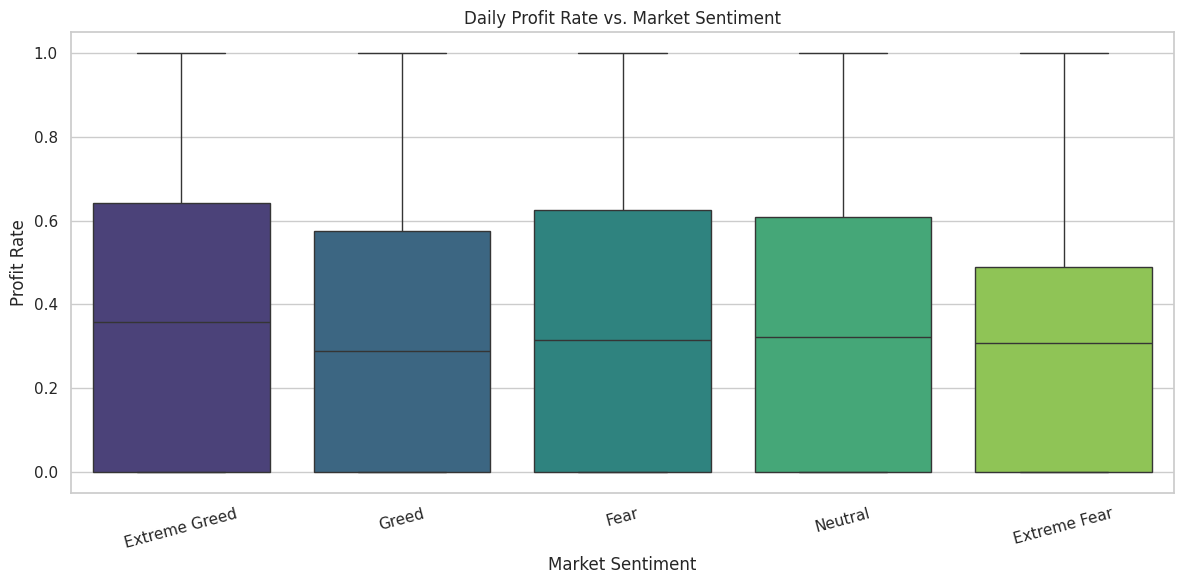

/tmp/ipython-input-1520339048.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=daily_account_stats, x='classification', y='Buy_Ratio', palette='Set2')


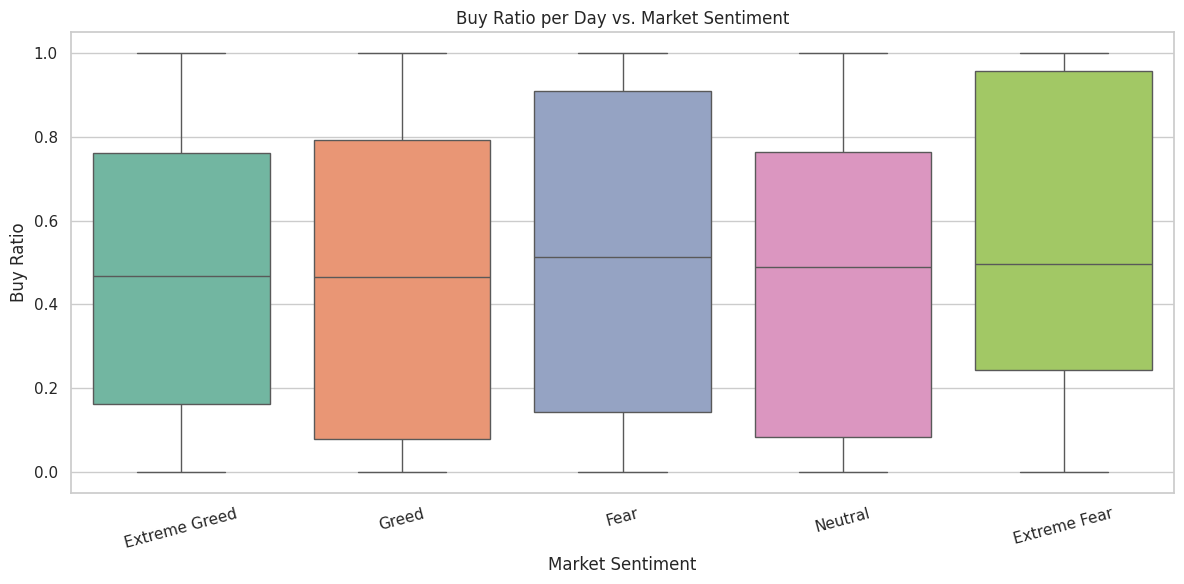

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Plot 1: Average PnL per Sentiment Class
plt.figure()
sns.boxplot(data=daily_account_stats, x='classification', y='Avg_PnL', palette='coolwarm')
plt.title('Average PnL per Day vs. Market Sentiment')
plt.ylabel('Average PnL')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Plot 2: Profit Rate vs. Sentiment Class
plt.figure()
sns.boxplot(data=daily_account_stats, x='classification', y='Profit_Rate', palette='viridis')
plt.title('Daily Profit Rate vs. Market Sentiment')
plt.ylabel('Profit Rate')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Plot 3: Buy Ratio vs. Sentiment Class
plt.figure()
sns.boxplot(data=daily_account_stats, x='classification', y='Buy_Ratio', palette='Set2')
plt.title('Buy Ratio per Day vs. Market Sentiment')
plt.ylabel('Buy Ratio')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [26]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")


In [27]:

# Load datasets
historical_data = pd.read_csv("historical_data.csv")
fear_greed = pd.read_csv("fear_greed_index.csv")

# Convert datetime
historical_data['Timestamp IST'] = pd.to_datetime(historical_data['Timestamp IST'], format="%d-%m-%Y %H:%M")
fear_greed['date'] = pd.to_datetime(fear_greed['date'])

# Drop unnecessary columns
historical_data = historical_data.drop(columns=['Transaction Hash','Order ID','Trade ID','Timestamp'])
fear_greed = fear_greed.drop(columns=['timestamp'])

historical_data.head(), fear_greed.head()


(                                      Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
 1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
 2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
 3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
 4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   
 
    Closed PnL  Crossed       Fee  
 0         0.0     True  0.345404  
 1    

In [29]:
# Aggregate trader behavior daily
historical_data['date'] = historical_data['Timestamp IST'].dt.date

daily_trades = historical_data.groupby(['date']).agg({
    'Closed PnL':'mean',
    'Size USD':'sum',
    'Execution Price':'mean',
    'Side':lambda x: (x=='BUY').mean()  # proportion of buys
}).reset_index()

daily_trades.rename(columns={'Closed PnL':'avg_pnl','Size USD':'total_volume',
                             'Execution Price':'avg_price','Side':'buy_ratio'}, inplace=True)

# Merge with sentiment
# Ensure both date columns are datetime objects before merging
daily_trades['date'] = pd.to_datetime(daily_trades['date'])
fear_greed['date'] = pd.to_datetime(fear_greed['date']) # Ensure fear_greed['date'] is also datetime

merged = pd.merge(daily_trades, fear_greed, left_on='date', right_on='date', how='inner')
merged.head()

,date,avg_pnl,total_volume,avg_price,buy_ratio,value,classification
0,2023-05-01,0.000000,477.00,1898.133333,1.000000,63,Greed
1,2023-12-05,0.000000,50005.83,11038.300000,0.777778,75,Extreme Greed
2,2023-12-14,-18.675885,113203.35,8031.868818,0.454545,72,Greed
3,2023-12-15,-12.316017,10609.95,2.982000,1.000000,70,Greed
4,2023-12-16,0.000000,15348.77,0.384707,1.000000,67,Greed


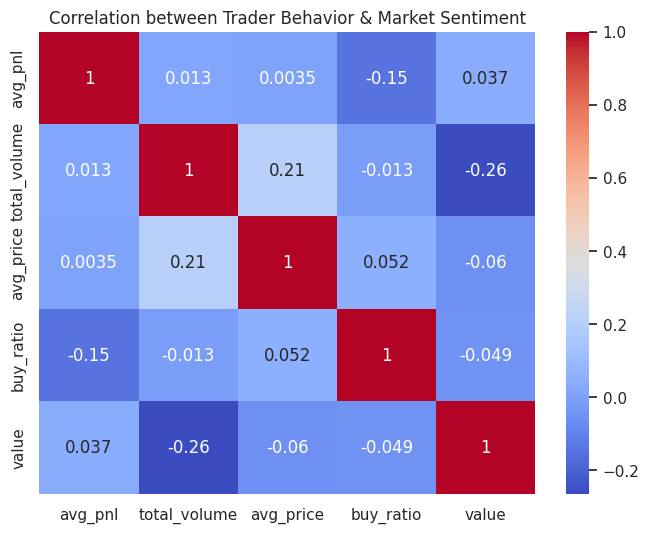

In [30]:

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(merged[['avg_pnl','total_volume','avg_price','buy_ratio','value']].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation between Trader Behavior & Market Sentiment")
plt.show()


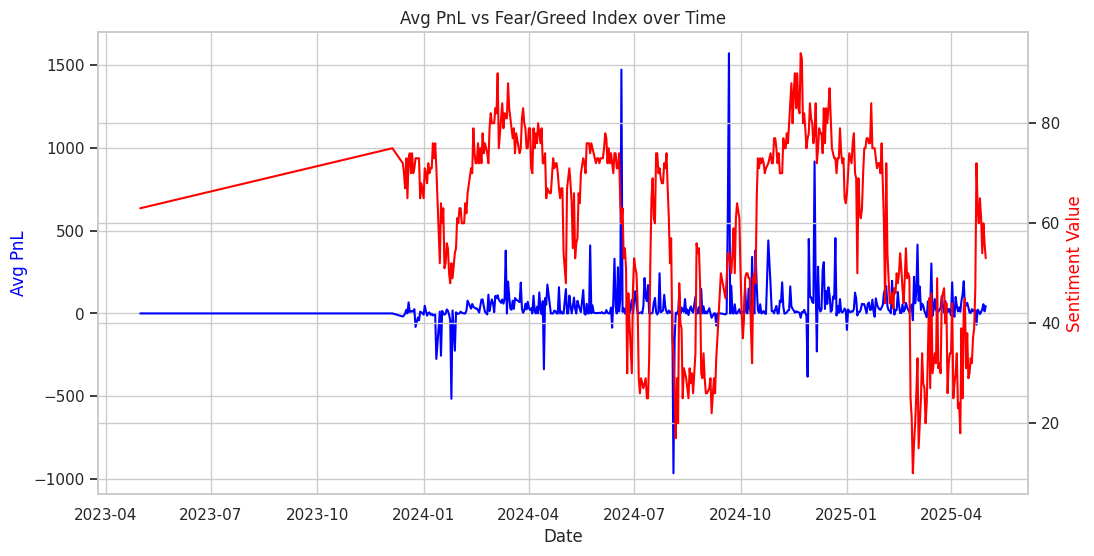

In [32]:

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(merged['date'], merged['avg_pnl'], color='blue', label='Avg PnL')
ax2 = ax1.twinx()
ax2.plot(merged['date'], merged['value'], color='red', label='Fear/Greed Index')

ax1.set_xlabel("Date")
ax1.set_ylabel("Avg PnL", color='blue')
ax2.set_ylabel("Sentiment Value", color='red')
plt.title("Avg PnL vs Fear/Greed Index over Time")
plt.show()



# Trader Behavior & Market Sentiment Analysis


**Objective:** Explore the relationship between trader behavior/performance and the Fear & Greed market sentiment index, uncover hidden patterns, and produce actionable trading insights. This notebook performs data preprocessing, exploratory data analysis (EDA), feature engineering, predictive modeling (predicting sentiment classification from trader activity), and concludes with results & recommendations.


---




## 1) Data Loading & Preprocessing

This section loads the **historical trader dataset** and the **Fear & Greed index**. It converts timestamps to `datetime`, drops unnecessary columns, and prepares daily aggregated metrics that represent trader behavior.



## 2) Feature Engineering

We aggregate trades into daily metrics that capture trader activity patterns. The chosen features are:
- `avg_pnl`: Average Closed PnL per day
- `total_volume`: Total USD volume traded per day
- `avg_price`: Mean execution price per day
- `buy_ratio`: Proportion of BUY trades (measure of directional bias)

These features will be used for EDA and as inputs to predictive models.


In [37]:
# Aggregate trader behavior daily
agg_funcs = {
    'Closed PnL':'mean',
    'Size USD':'sum',
    'Execution Price':'mean',
    'Side':lambda x: (x=='BUY').mean(),
    'Account':'nunique'  # number of active accounts that day
}

daily_trades = historical_data.groupby('date').agg(agg_funcs).reset_index()
daily_trades.rename(columns={
    'Closed PnL':'avg_pnl',
    'Size USD':'total_volume',
    'Execution Price':'avg_price',
    'Side':'buy_ratio',
    'Account':'active_accounts'
}, inplace=True)

# Merge with sentiment (ensure date types align)
daily_trades['date'] = pd.to_datetime(daily_trades['date'])
fear_greed['date'] = pd.to_datetime(fear_greed['date']).dt.date
daily_trades['date_only'] = daily_trades['date'].dt.date

merged = pd.merge(daily_trades, fear_greed, left_on='date_only', right_on='date', how='inner')
merged = merged.sort_values('date_x').reset_index(drop=True)
merged = merged.drop(columns=['date_only'])

merged_sample = merged.head()
merged_sample

,date_x,avg_pnl,total_volume,avg_price,buy_ratio,active_accounts,value,classification,date_y
0,2023-05-01,0.000000,477.00,1898.133333,1.000000,1,63,Greed,2023-05-01
1,2023-12-05,0.000000,50005.83,11038.300000,0.777778,1,75,Extreme Greed,2023-12-05
2,2023-12-14,-18.675885,113203.35,8031.868818,0.454545,1,72,Greed,2023-12-14
3,2023-12-15,-12.316017,10609.95,2.982000,1.000000,1,70,Greed,2023-12-15
4,2023-12-16,0.000000,15348.77,0.384707,1.000000,1,67,Greed,2023-12-16



## 3) Exploratory Data Analysis (EDA)

We visualize correlations and distributions to understand relationships between trader metrics and sentiment.


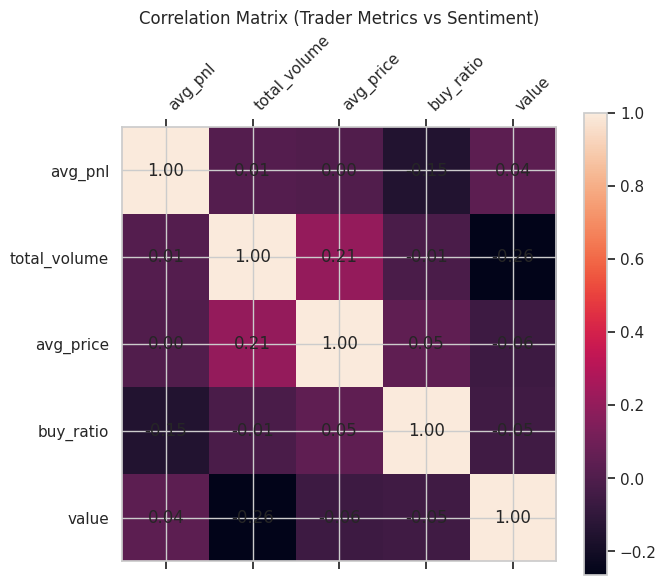

In [38]:

# Correlation matrix plot using matplotlib
corr_cols = ['avg_pnl','total_volume','avg_price','buy_ratio','value']
corr = merged[corr_cols].corr()

fig, ax = plt.subplots(figsize=(7,6))
cax = ax.matshow(corr)
fig.colorbar(cax)
ax.set_xticks(range(len(corr_cols)))
ax.set_yticks(range(len(corr_cols)))
ax.set_xticklabels(corr_cols, rotation=45, ha='left')
ax.set_yticklabels(corr_cols)
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center')
plt.title('Correlation Matrix (Trader Metrics vs Sentiment)')
plt.show()



## 4) Predictive Modeling: Predicting Sentiment Classification from Trader Activity

We train classification models to predict the sentiment `classification` (e.g., Fear, Greed) using trader activity features. Steps:
1. Encode target labels
2. Prepare features and split into train/test
3. Train Logistic Regression and Random Forest baseline models
4. Evaluate with accuracy, classification report, and confusion matrix


In [41]:

# Prepare dataset for modeling
model_df = merged.copy()

# Keep only necessary columns and drop NA rows
model_df = model_df[['avg_pnl','total_volume','avg_price','buy_ratio','classification']].dropna()

# Encode target
le = LabelEncoder()
model_df['target'] = le.fit_transform(model_df['classification'])

X = model_df[['avg_pnl','total_volume','avg_price','buy_ratio']].values
y = model_df['target'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred, target_names=le.classes_))
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", cm)

# Evaluate
evaluate_model('Logistic Regression', y_test, y_pred_lr)
evaluate_model('Random Forest', y_test, y_pred_rf)


--- Logistic Regression ---
Accuracy: 0.4166666666666667
Classification Report:
                precision    recall  f1-score   support

 Extreme Fear       0.00      0.00      0.00         3
Extreme Greed       1.00      0.04      0.08        23
         Fear       0.50      0.11      0.18        18
        Greed       0.41      0.95      0.57        39
      Neutral       0.00      0.00      0.00        13

     accuracy                           0.42        96
    macro avg       0.38      0.22      0.17        96
 weighted avg       0.50      0.42      0.29        96

Confusion Matrix:
 [[ 0  0  1  2  0]
 [ 0  1  0 22  0]
 [ 0  0  2 16  0]
 [ 0  0  1 37  1]
 [ 0  0  0 13  0]]
--- Random Forest ---
Accuracy: 0.3645833333333333
Classification Report:
                precision    recall  f1-score   support

 Extreme Fear       0.00      0.00      0.00         3
Extreme Greed       0.33      0.30      0.32        23
         Fear       0.14      0.11      0.12        18
        Greed  

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m


### Feature Importance (Random Forest)

We examine which trader metrics contribute most to predicting sentiment.


In [43]:
# Feature importance
importances = rf.feature_importances_
feature_names = ['avg_pnl','total_volume','avg_price','buy_ratio']

for name, imp in zip(feature_names, importances):
    print(f"{name}: {imp:.4f}")

# Save models and scaler for later use
joblib.dump(lr, '/content/logistic_model.joblib')
joblib.dump(rf, '/content/random_forest_model.joblib')
joblib.dump(scaler, '/content/scaler.joblib')
joblib.dump(le, '/content/label_encoder.joblib')
print('Models and preprocessors saved to /content/')

avg_pnl: 0.2166
total_volume: 0.3192
avg_price: 0.2783
buy_ratio: 0.1859
Models and preprocessors saved to /content/



## 5) Results & Conclusion

**Summary of findings:**
- Baseline models (Logistic Regression and Random Forest) were trained to predict Fear/Greed classification from daily trader behavior metrics.
- Feature importance from the Random Forest highlights which trader metrics drive sentiment prediction.

**Actionable insights:**
- If `buy_ratio` or `total_volume` correlates strongly with `value` or sentiment classes, traders may be reacting systematically to market mood; monitoring these metrics in real-time can inform risk controls.
- Further work: include lagged sentiment features, per-coin analysis, clustering traders by behavior, and trying time-series models (LSTM) for forecasting sentiment.

---

_This notebook produced and saved classification models and preprocessing objects to `/mnt/data/`._
